# Importing Libraries

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

#import numpy as np

#import requests

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#from PIL import Image, ImageOps

import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Pre-configured Parameters

In [5]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

# Configuring Other Notebook Parameters

In [6]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [7]:
sys.path.append("../")

In [8]:
from Modules import *

# Loading Datasets

In [9]:
training_dataset = datasets.MNIST(root="../Datasets",
                                  train=True,
                                  download=True,
                                  transform=transform)

validation_dataset = datasets.MNIST(root="../Datasets",
                                    train=False,
                                    download=True,
                                    transform=transform)

In [10]:
training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=100,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=100,
                                                shuffle=False)

# Practicing in Stages

## Neural Network Implementation with PyTorch

In [11]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


tabulation = Form_Generator()
tabulation.heading_printer(
    "Definition of custom convolutional neural module class")

definitions = [
    """
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
"""
]
tabulation.definition_generator(definitions)

Definition of custom convolutional neural module class

    +-----------------------------------------------+
    | Definition                                    |
    +-----------------------------------------------+
    | class LeNet(nn.Module):                       |
    |                                               |
    |     def __init__(self):                       |
    |         super().__init__()                    |
    |         self.conv1 = nn.Conv2d(1, 20, 5, 1)   |
    |         self.conv2 = nn.Conv2d(20, 50, 5, 1)  |
    |         self.fc1 = nn.Linear(4 * 4 * 50, 500) |
    |         self.fc2 = nn.Linear(500, 10)         |
    |                                               |
    |     def forward(self, x):                     |
    |         x = F.relu(self.conv1(x))             |
    |         x = F.max_pool2d(x, 2, 2)             |
    |         x = F.relu(self.conv2(x))             |
    |         x = F.max_pool2d(x, 2, 2)             |
    |         x = x.view(-

## Model Training with PyTorch

In [12]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

tabulation = Form_Generator()
tabulation.heading_printer(
    "Enabling GPU training acceleration for Mac computers with Apple Silicon")

statements = [
    "device = torch.device(\"mps:0\" if torch.backends.mps.is_available() "
    "else \"cpu\")"
]
tabulation.statement_generator(statements)

variables = ["device"]
values = [str(device)]
tabulation.variable_generator(variables, values)

expressions = ["device.index"]
results = [str(device.index)]
tabulation.expression_generator(expressions, results)

Enabling GPU training acceleration for Mac computers with Apple Silicon

    +---------------------------------------------------+
    | Statement                                         |
    +---------------------------------------------------+
    | device = torch.device("mps:0" if                  |
    |     torch.backends.mps.is_available() else "cpu") |
    +---------------------------------------------------+
    +----------+-------+
    | Variable | Value |
    +----------+-------+
    | device   | mps:0 |
    +----------+-------+
    +--------------+--------+
    | Expression   | Result |
    +--------------+--------+
    | device.index | 0      |
    +--------------+--------+


In [13]:
model = LeNet().to(device)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Initialization of custom convolutional neural module class")

statements = ["model = LeNet().to(device)"]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

Initialization of custom convolutional neural module class

    +----------------------------+
    | Statement                  |
    +----------------------------+
    | model = LeNet().to(device) |
    +----------------------------+
    +----------+-----------------------------------------------+
    | Variable | Value                                         |
    +----------+-----------------------------------------------+
    | model    | LeNet(                                        |
    |          |   (conv1): Conv2d(1, 20, kernel_size=(5, 5),  |
    |          |         stride=(1, 1))                        |
    |          |   (conv2): Conv2d(20, 50, kernel_size=(5, 5), |
    |          |         stride=(1, 1))                        |
    |          |   (fc1): Linear(in_features=800,              |
    |          |         out_features=500, bias=True)          |
    |          |   (fc2): Linear(in_features=500,              |
    |          |         out_features=10, bias=Tru

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Specific configuration settings for the training process")

statements = [
    """
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["criterion", "optimizer"]
values = [str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Specific configuration settings for the training process

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | criterion = nn.CrossEntropyLoss()                         |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.01) |
    +-----------------------------------------------------------+
    +-----------+---------------------------+
    | Variable  | Value                     |
    +-----------+---------------------------+
    | criterion | CrossEntropyLoss()        |
    | optimizer | Adam (                    |
    |           | Parameter Group 0         |
    |           |     amsgrad: False        |
    |           |     betas: (0.9, 0.999)   |
    |           |     capturable: False     |
    |           |     differentiable: False |
    |           |     eps: 1e-08            |
    |           |     foreach: None     

In [15]:
epochs = 15
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural model")

statements = [
    """
for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(reprlib_rules.repr(running_loss_history)),
    str(reprlib_rules.repr(running_accu_history)),
    str(reprlib_rules.repr(val_running_loss_history)),
    str(reprlib_rules.repr(val_running_accu_history))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Training and testing of custom convolutional neural model

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0                                   |
    |                                                            |
    |     for inputs, labels in training_loader:                 |
    |         inputs = inputs.to(device)                         |
    |         labels = labels.to(device)                         |
    |         outputs = model(inputs)                            |
    |         loss = criterion(outputs, labels)                  |
   

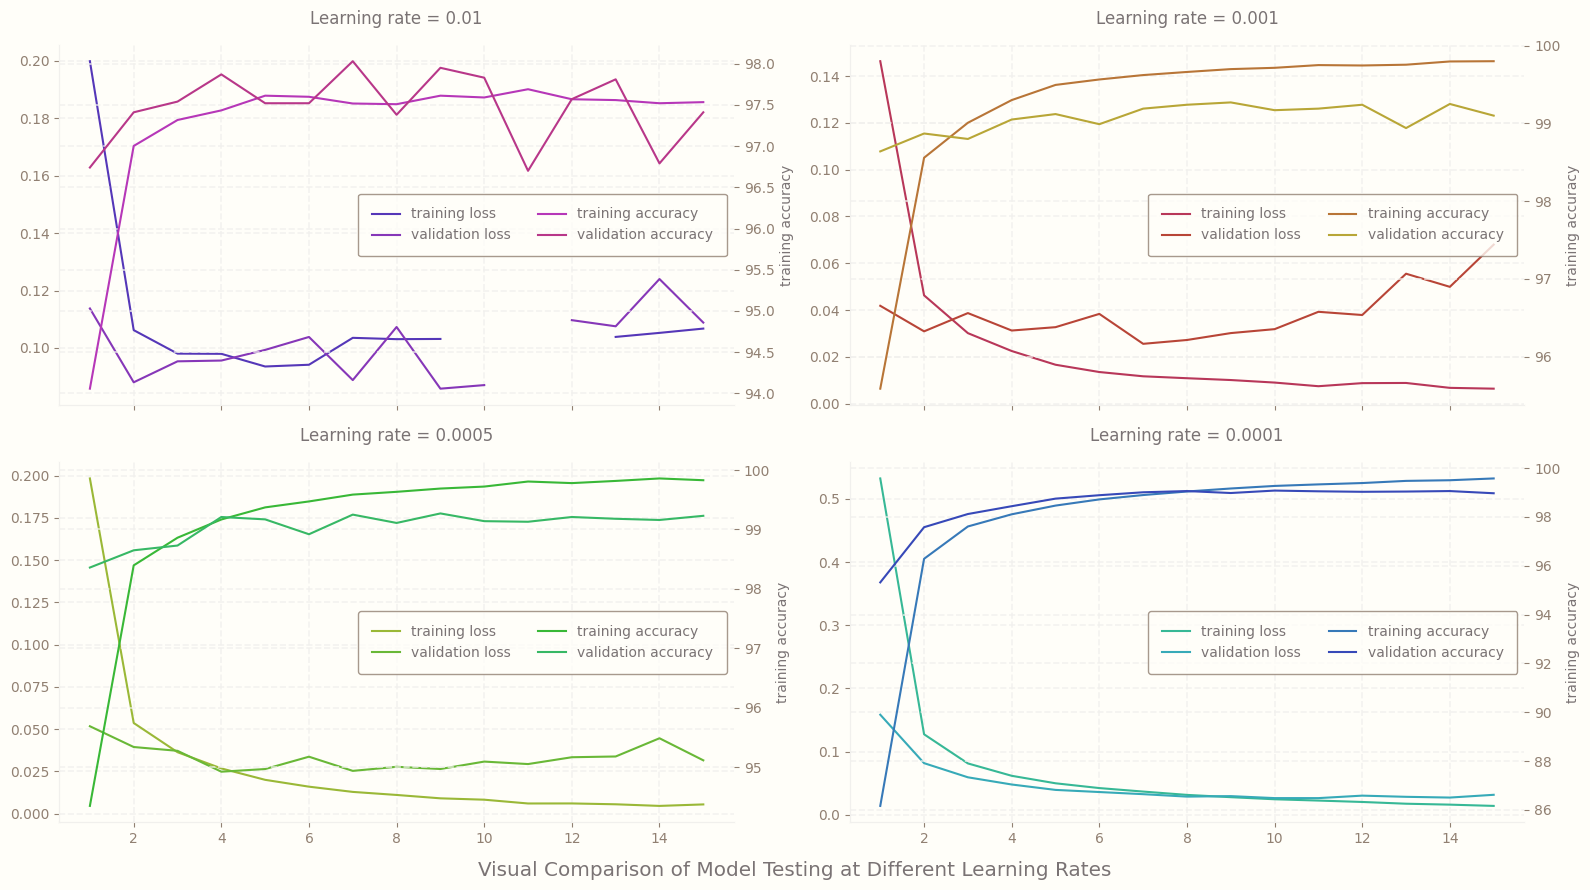

In [16]:
def loader_training_iterations(lr, criterion, optimizer_type, **kwargs):
    criterion = criterion
    optimizer = optimizer_type(model.parameters(), lr, **kwargs)
    running_loss = 0.0
    running_accu = 0
    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)
    else:
        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
    return epoch_loss, epoch_accu


def loader_validation_iterations(lr, criterion):
    criterion = criterion
    val_running_loss = 0.0
    val_running_accu = 0
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            _, val_preds = torch.max(val_outputs, 1)
            val_running_loss += val_loss.item()
            val_running_accu += torch.sum(val_preds == val_labels.data)
        else:
            val_epoch_loss = val_running_loss / len(validation_loader)
            val_epoch_accu = val_running_accu.float() / len(validation_loader)
    return val_epoch_loss, val_epoch_accu


def validation_iterations(epochs,
                          lr,
                          criterion=nn.CrossEntropyLoss(),
                          optimizer_type=torch.optim.Adam,
                          **kwargs):
    epochs = epochs
    loss = []
    accu = []
    val_loss = []
    val_accu = []
    for e in range(epochs):
        epoch_loss, epoch_accu = loader_training_iterations(
            lr, criterion, optimizer_type, **kwargs)
        val_epoch_loss, val_epoch_accu = loader_validation_iterations(
            lr, criterion)
        loss.append(epoch_loss)
        accu.append(epoch_accu.item())
        val_loss.append(val_epoch_loss)
        val_accu.append(val_epoch_accu.item())
    return loss, accu, val_loss, val_accu


colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

lr_list = [0.01, 0.001, 0.0005, 0.0001]

for i in range(2):
    for j in range(2):
        model = Classifier(784, 125, 65, 10)
        loss, accu, val_loss, val_accu = validation_iterations(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

In [17]:
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x


tabulation = Form_Generator()
tabulation.heading_printer(
    "Definition of custom convolutional neural module class with dropout layers"
)

definitions = [
    """
class LeNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.fc2(x)
        return x
"""
]
tabulation.definition_generator(definitions)

Definition of custom convolutional neural module class with dropout layers

    +-----------------------------------------------+
    | Definition                                    |
    +-----------------------------------------------+
    | class LeNet(nn.Module):                       |
    |                                               |
    |     def __init__(self):                       |
    |         super().__init__()                    |
    |         self.conv1 = nn.Conv2d(1, 20, 5, 1)   |
    |         self.conv2 = nn.Conv2d(20, 50, 5, 1)  |
    |         self.fc1 = nn.Linear(4 * 4 * 50, 500) |
    |         self.dropout1 = nn.Dropout(0.5)       |
    |         self.fc2 = nn.Linear(500, 10)         |
    |                                               |
    |     def forward(self, x):                     |
    |         x = F.relu(self.conv1(x))             |
    |         x = F.max_pool2d(x, 2, 2)             |
    |         x = F.relu(self.conv2(x))             |
    | 

In [18]:
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Reinitialization of neural module, criterion and optimizer")

statements = [
    """
model = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
"""
]
tabulation.statement_generator(statements)

variables = ["model", "criterion", "optimizer"]
values = [str(model), str(criterion), str(optimizer)]
tabulation.variable_generator(variables, values)

Reinitialization of neural module, criterion and optimizer

    +-----------------------------------------------------------+
    | Statement                                                 |
    +-----------------------------------------------------------+
    | model = LeNet().to(device)                                |
    |                                                           |
    | criterion = nn.CrossEntropyLoss()                         |
    | optimizer = torch.optim.Adam(model.parameters(), lr=0.01) |
    +-----------------------------------------------------------+
    +-----------+-----------------------------------------------+
    | Variable  | Value                                         |
    +-----------+-----------------------------------------------+
    | model     | LeNet(                                        |
    |           |   (conv1): Conv2d(1, 20, kernel_size=(5, 5),  |
    |           |         stride=(1, 1))                        |
    |           

In [19]:
epochs = 15
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

dataframe = DataFrame_Generator("epoch", "loss", "accuracy", "validation loss",
                                "validation accuracy")

for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())

tabulation = Form_Generator()
tabulation.heading_printer(
    "Training and testing of custom convolutional neural model with dropout layers"
)

statements = [
    """
for e in range(epochs):
    running_loss = 0.0
    running_accu = 0
    val_running_loss = 0.0
    val_running_accu = 0

    for inputs, labels in training_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_accu += torch.sum(preds == labels.data)

    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_outputs = model(val_inputs)
                val_loss = criterion(val_outputs, val_labels)

                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += val_loss.item()
                val_running_accu += torch.sum(val_preds == val_labels.data)

        epoch_loss = running_loss / len(training_loader)
        epoch_accu = running_accu.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_accu_history.append(epoch_accu.item())

        val_epoch_loss = val_running_loss / len(validation_loader)
        val_epoch_accu = val_running_accu.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_accu_history.append(val_epoch_accu.item())

        dataframe.updater(e + 1, epoch_loss, epoch_accu.item(), val_epoch_loss,
                          val_epoch_accu.item())
"""
]
tabulation.statement_generator(statements)

variables = [
    "epochs", "running_loss_history", "running_accu_history",
    "val_running_loss_history", "val_running_accu_history"
]
values = [
    str(epochs),
    str(reprlib_rules.repr(running_loss_history)),
    str(reprlib_rules.repr(running_accu_history)),
    str(reprlib_rules.repr(val_running_loss_history)),
    str(reprlib_rules.repr(val_running_accu_history))
]
tabulation.variable_generator(variables, values, expandtabs=1)

df_table = dataframe.tabulation()
tabulation.dataframe_generator(df_table)

Training and testing of custom convolutional neural model with dropout layers

    +------------------------------------------------------------+
    | Statement                                                  |
    +------------------------------------------------------------+
    | for e in range(epochs):                                    |
    |     running_loss = 0.0                                     |
    |     running_accu = 0                                       |
    |     val_running_loss = 0.0                                 |
    |     val_running_accu = 0                                   |
    |                                                            |
    |     for inputs, labels in training_loader:                 |
    |         inputs = inputs.to(device)                         |
    |         labels = labels.to(device)                         |
    |         outputs = model(inputs)                            |
    |         loss = criterion(outputs, labels)   

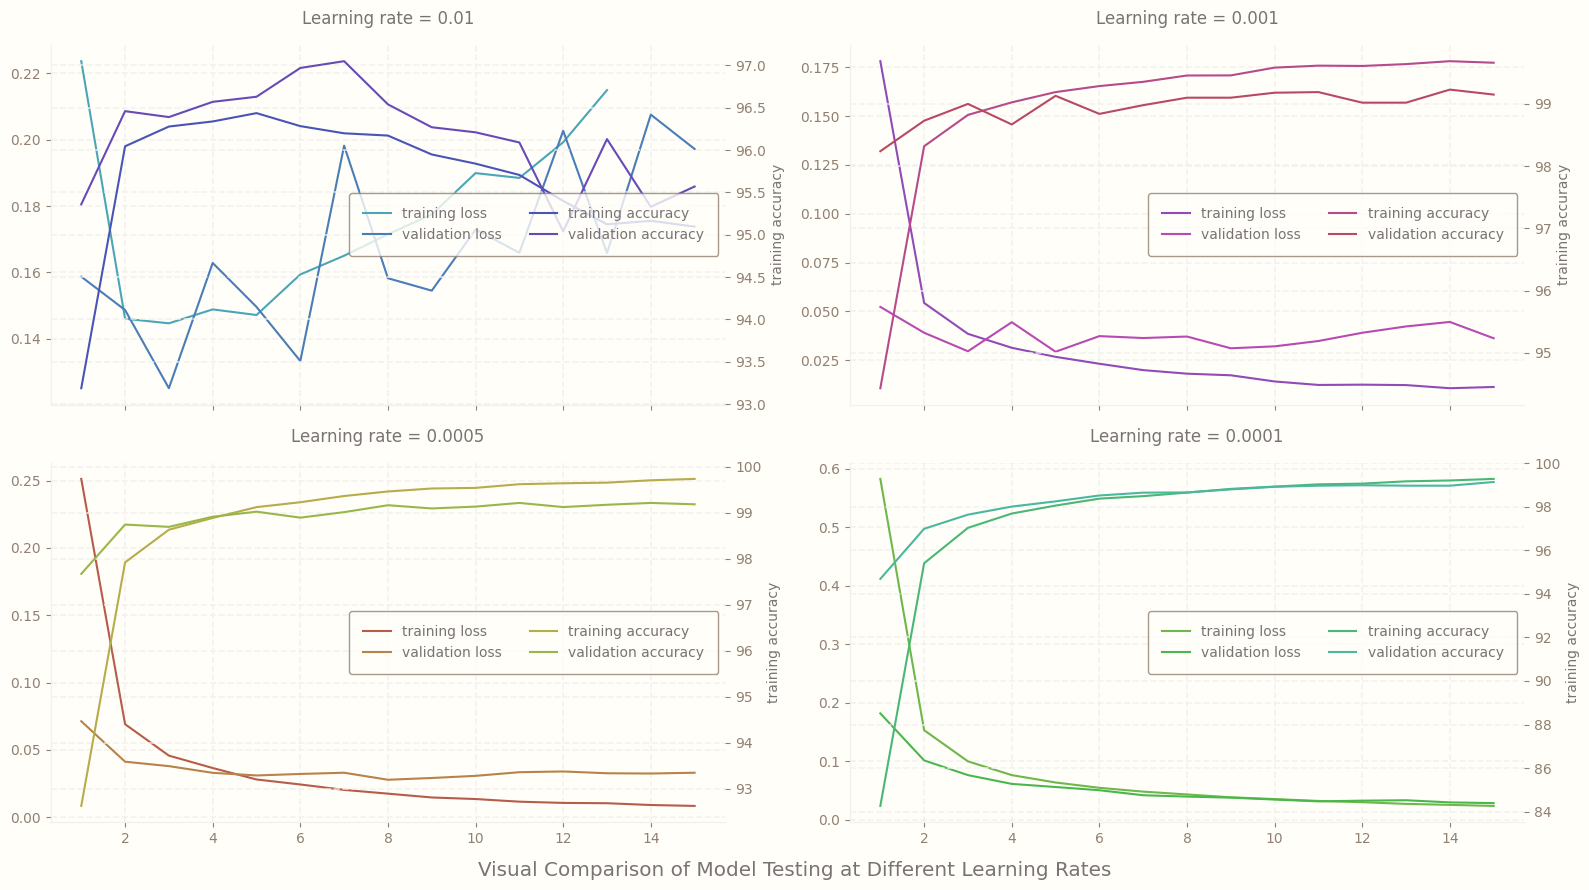

In [20]:
colors = calm_color_generator(16)
plt.rcParams["figure.figsize"] = (figure_size[0], figure_size[1])

fig, axs = plt.subplots(2, 2, sharex=True)

for i in range(2):
    for j in range(2):
        model = Classifier(784, 125, 65, 10)
        loss, accu, val_loss, val_accu = validation_iterations(
            epochs=epochs, lr=lr_list[i * 2 + j])
        line1 = axs[i, j].plot(range(1, epochs + 1),
                               loss,
                               label="training loss",
                               c=colors.pop(0))
        line2 = axs[i, j].plot(range(1, epochs + 1),
                               val_loss,
                               label="validation loss",
                               c=colors.pop(0))
        axs[i, j].set(xlabel="epoch", ylabel="training loss")
        axs[i, j] = axs[i, j].twinx()
        line3 = axs[i, j].plot(range(1, epochs + 1),
                               accu,
                               label="training accuracy",
                               c=colors.pop(0))
        line4 = axs[i, j].plot(range(1, epochs + 1),
                               val_accu,
                               label="validation accuracy",
                               c=colors.pop(0))
        axs[i, j].set(ylabel="training accuracy")
        lines = line1 + line2 + line3 + line4
        labels = [line.get_label() for line in lines]
        axs[i, j].legend(lines,
                         labels,
                         loc="center right",
                         borderpad=1,
                         ncol=2)

for ax, lr in zip(axs.flat, lr_list):
    ax.set_title("Learning rate = {}".format(lr), loc="center", pad=15)

fig.suptitle("Visual Comparison of Model Testing at Different Learning Rates",
             fontsize="x-large",
             x=0.5,
             y=0)

plt.tight_layout()
plt.show()

colors = calm_color_generator(80)
fig = plt.figure(figsize=(figure_size[0], figure_size[1] * 2),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=1, figure=fig, wspace=.08, hspace=None)

bbox_props = dict(boxstyle="round",
                  fc=plt.rcParams["axes.facecolor"],
                  ec="0.5",
                  alpha=0.67)

dataiter = iter(validation_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
images_ = images.view(images.shape[0], -1)

for idx, lr in zip(np.arange(4), lr_list):
    model = LeNet().to(device)
    validation_iterations(epochs=epochs, lr=lr)
    outputs = model(images_)
    _, preds = torch.max(outputs, 1)
    title = "Learning rate = {}".format(lr).center(40, " ")
    ax = fig.add_subplot(gs[idx], xticks=[], yticks=[], frameon=False)
    ax.set_title(title,
                 y=1.05,
                 loc="center",
                 pad=0,
                 fontweight="heavy",
                 bbox=bbox_props)

    for k in range(20):
        bgcolor = colors.pop(0)
        spaces = " " * 7
        exec(f"axins{k} = ax.inset_axes([0.1 * (k % 10), 0.5 * (k // 10), \
        0.1, 0.45])")
        exec(f"axins{k}.set(xticks=[], yticks=[], frame_on=False)")
        exec(f"axins{k}.imshow(im_convert(images[(k)])) if preds[k] == \
        labels[k] else axins{k}.imshow(image_to_scalar_data(images[(k)]), \
        cmap=\"binary\")")
        exec(f"axins{k}.set_title(\
        \"{spaces}#{str(preds[k].item())}(#{str(labels[k].item())}){spaces}\", \
        y=1.025, loc=\"center\", color=(plt.rcParams[\"axes.facecolor\"] \
        if preds[k] == labels[k] else bgcolor), backgroundcolor=(bgcolor \
        if preds[k] == labels[k] else plt.rcParams[\"axes.facecolor\"]), \
        fontweight=\"bold\")")

fig.suptitle(
    "Visual Comparison of Model Testing Effect under Different Learning Rates",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.show()